In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\PAWAN\\Gitdemo\\Weather-Data-Analysis\\Data\\Project+1+-+Weather+Dataset.csv")

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
data.rename(columns={'Temp_C':'Temperature_C', 'Dew Point Temp_C':'Dew_Point_Temp_C', 
       'Wind Speed_km/h':'Wind_Speed_km/h', 'Press_kPa':'Pressure_kPa'},inplace=True)
data.columns


Index(['Date/Time', 'Temperature_C', 'Dew_Point_Temp_C', 'Rel Hum_%',
       'Wind_Speed_km/h', 'Visibility_km', 'Pressure_kPa', 'Weather'],
      dtype='object')

In [6]:
data["Date/Time"]=pd.to_datetime(data["Date/Time"])

In [7]:
data.shape

(8784, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temperature_C     8784 non-null   float64       
 2   Dew_Point_Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind_Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Pressure_kPa      8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [9]:
data.describe()

,Date/Time,Temperature_C,Dew_Point_Temp_C,Rel Hum_%,Wind_Speed_km/h,Visibility_km,Pressure_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


# Column Creation

In [10]:
data["Hour"]= data["Date/Time"].dt.hour
data["Month"]= data["Date/Time"].dt.month
data["Day"]= data["Date/Time"].dt.day

In [11]:
data.head(3)

,Date/Time,Temperature_C,Dew_Point_Temp_C,Rel Hum_%,Wind_Speed_km/h,Visibility_km,Pressure_kPa,Weather,Hour,Month,Day
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1,1


# Checking Skewness the data

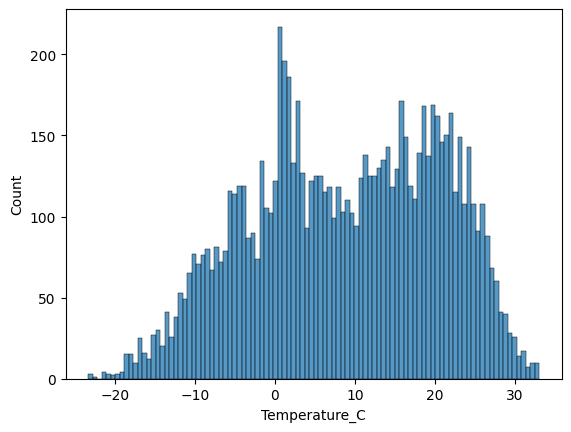

In [12]:
sns.histplot(data, x="Temperature_C", bins=100)
plt.show()

In [13]:
from scipy.stats import skew

In [14]:
data.columns

for i in data.drop(columns=['Date/Time','Weather', 'Hour','Month', 'Day']).columns:
    print(f"{i} : {data[i].skew()}")

Temperature_C : -0.17766634898276745
Dew_Point_Temp_C : -0.31843338608156885
Rel Hum_% : -0.32383026939145887
Wind_Speed_km/h : 0.8713742625776061
Visibility_km : 0.41336159676061063
Pressure_kPa : -0.22992511978286803


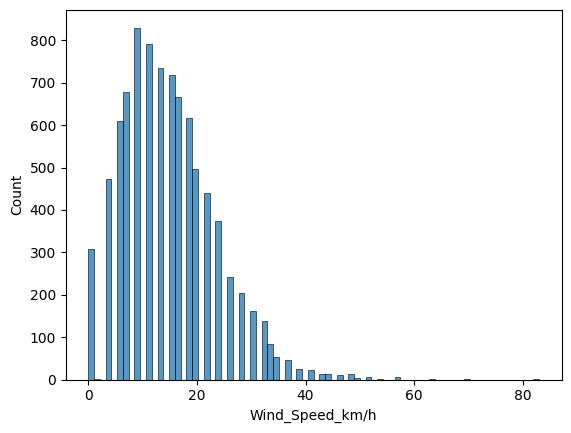

In [15]:
sns.histplot(data ,x="Wind_Speed_km/h")
plt.show()

In [16]:
data1=pd.DataFrame( {"Wind_Speed_km/h_sqrt":np.sqrt(data["Wind_Speed_km/h"]) ,"Wind_Speed_km/h_log": np.log(data["Wind_Speed_km/h"])})

C:\Users\PAWAN\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
data1

,Wind_Speed_km/h_sqrt,Wind_Speed_km/h_log
0,2.000000,1.386294
1,2.000000,1.386294
2,2.645751,1.945910
3,2.449490,1.791759
4,2.645751,1.945910
...,...,...
8779,5.477226,3.401197
8780,4.898979,3.178054
8781,5.291503,3.332205
8782,5.291503,3.332205


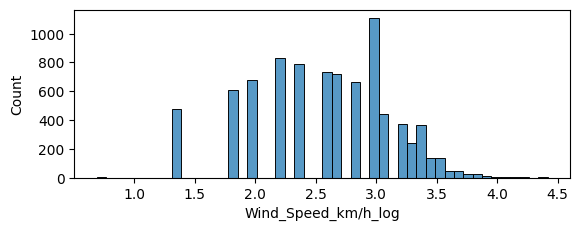

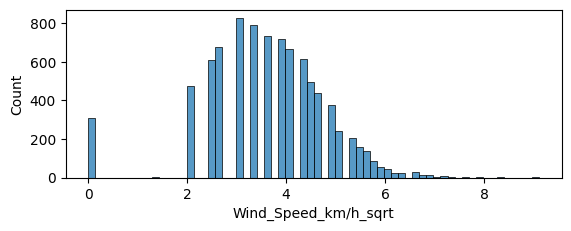

In [18]:
plt.subplot(2,1,2)
sns.histplot(data1 ,x="Wind_Speed_km/h_log")
plt.show()

plt.subplot(2,1,1)
sns.histplot(data1 ,x="Wind_Speed_km/h_sqrt")
plt.show()


In [19]:
data["Wind_Speed_km/h"]=data1["Wind_Speed_km/h_log"]

# Checking Correlation 

In [20]:
x=data.drop(columns=['Date/Time','Weather'])

In [21]:

corr_martix=[]

for i in x.columns:
    for j in x.columns:
        
    
        if i != j:
            corr_value= data[i].corr(data[j])
            if corr_value >0.90:
                if i not in corr_martix:
                    corr_martix.append(i)
                
        
print(corr_martix)      
        
        

['Temperature_C', 'Dew_Point_Temp_C']


c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\numpy\lib\_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [22]:
x["Temperature_C"].corr(x["Dew_Point_Temp_C"])

np.float64(0.9327141498173764)

In [23]:
x.drop(columns=["Dew_Point_Temp_C"],inplace=True)

In [24]:
corr_martix=[]

for i in x.columns:
    for j in x.columns:
        
    
        if i != j:
            corr_value= data[i].corr(data[j])
            if corr_value >0.90:
                if i not in corr_martix:
                    corr_martix.append(i)
                
        
print(corr_martix)  

[]


c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\numpy\lib\_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


# performing Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [62]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [27]:
x.isnull().sum()

Temperature_C      0
Rel Hum_%          0
Wind_Speed_km/h    0
Visibility_km      0
Pressure_kPa       0
Hour               0
Month              0
Day                0
dtype: int64

In [28]:
print(np.isinf(x).sum())

Temperature_C        0
Rel Hum_%            0
Wind_Speed_km/h    309
Visibility_km        0
Pressure_kPa         0
Hour                 0
Month                0
Day                  0
dtype: int64


In [29]:
x=pd.DataFrame(np.nan_to_num(x,posinf=0,neginf=0),columns=x.columns)

In [63]:
print(np.isinf(x).sum())

Temperature_C      0
Rel Hum_%          0
Wind_Speed_km/h    0
Visibility_km      0
Pressure_kPa       0
Hour               0
Month              0
Day                0
dtype: int64


In [64]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# training model

In [65]:
y= data["Weather"]

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=72)

x_train.shape,x_test.shape, y_train.shape, y_test.shape

((7027, 8), (1757, 8), (7027,), (1757,))

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [68]:
lr.fit(x_train,y_train)

lr.score(x_test,y_test)

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.373363688104724

In [69]:
from sklearn.metrics import recall_score, f1_score,precision_score,accuracy_score

In [70]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=17)

In [71]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
KNN.score(x_test,y_test)

0.46158224245873647

In [73]:
y_predicted = KNN.predict(x_test)

In [74]:
f1_score(y_test,y_predicted,average="macro")

0.18477066018004643

# feature selection


In [75]:
from sklearn.feature_selection import  SequentialFeatureSelector

Knn= KNeighborsClassifier(n_neighbors=9)

sfs= SequentialFeatureSelector(Knn,n_features_to_select=3,direction="forward", cv=5)

sfs.fit(x,y)



c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=9),
                          n_features_to_select=3)

In [76]:
selected_feature= x.columns[sfs.get_support()]

In [77]:
selected_feature

Index(['Rel Hum_%', 'Wind_Speed_km/h', 'Visibility_km'], dtype='object')

In [78]:
x_train,x_test,y_train,y_test= train_test_split(x[selected_feature],y, test_size=0.80,random_state=42)

In [79]:
Knn2 = KNeighborsClassifier(n_neighbors=5)

Knn2.fit(x_train,y_train)

Knn2.score(x_test,y_test)

0.3151678998292544

In [80]:
x_train

,Rel Hum_%,Wind_Speed_km/h,Visibility_km
3998,0.146341,0.542653,1.000000
8167,0.670732,0.542653,0.496881
3741,0.548780,0.612842,0.515593
3508,0.585366,0.497240,0.515593
7997,0.719512,0.405482,0.515593
...,...,...,...
5734,0.573171,0.612842,0.515593
5191,0.597561,0.641167,1.000000
5390,0.463415,0.580458,1.000000
860,0.597561,0.719205,0.515593
